In [1]:
# IMPORT THE NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.signal import medfilt


In [2]:
dataset = pd.read_excel("FOREARM EMG VER 2.xlsx")
test_dataset = pd.read_table("C:\\Users\\husai\\OneDrive\\Documents\\UCL NOTES\\3RD YEAR RESEARCH PROJECT\\DATA COLLECTION\\EMG DATA\\GESTURE DATA\\1 SECOND SAMPLING TEST.txt")

In [3]:
dataset

,Program Time [s],data 0
0,28.8406,455
1,28.8427,468
2,28.8457,447
3,28.8477,442
4,28.8497,484
...,...,...
4995,40.1147,470
4996,40.1176,464
4997,40.1196,471
4998,40.1216,473


In [4]:
test_dataset

,402
0,414
1,417
2,417
3,414
4,404
...,...
437,401
438,395
439,379
440,370


In [5]:
forearm_emg_data = dataset['data 0']

In [6]:
forearm_emg_data

0       455
1       468
2       447
3       442
4       484
       ... 
4995    470
4996    464
4997    471
4998    473
4999    475
Name: data 0, Length: 5000, dtype: int64

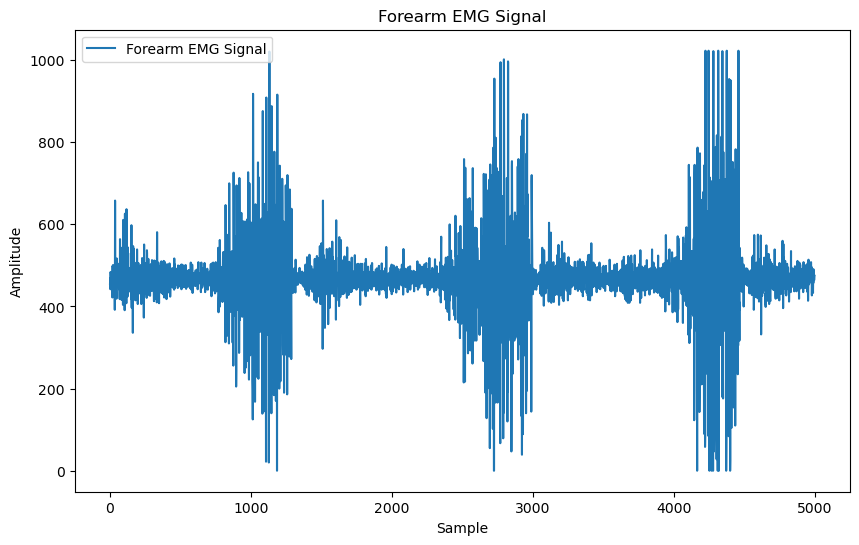

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(forearm_emg_data, label='Forearm EMG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Forearm EMG Signal')
plt.legend()
plt.show()

In [64]:
## FUNCTION FOR BUTTER BANDPASS FILTER

def butter_bandpass(lowcut,highcut,fs,order=4):
    nyq = 0.5 * fs
    low = lowcut/nyq
    high = highcut/nyq
    b,a = butter(order,[low,high],btype='band')
    return b,a

def butter_bandpass_filter(data,lowcut,highcut,fs,order=4):
    b,a = butter_bandpass(lowcut,highcut,fs,order=order)
    y = filtfilt(b,a,data)
    return y

In [65]:
## FUNCTION FOR SIGNAL RECTIFICATION

def rectify_signal(data):
    return np.abs(data)

In [66]:
## FUNCTION FOR BASELINE CORRECTION

def baseline_correction(data):
    return data - np.mean(data)

In [81]:
## FUNCTION FOR ZERO-CENTRED 

def zero_centered(data):
    return data - np.mean(data)

In [76]:
## FUNCTION FOR SQUARED SIGNAL

def squared_signal(data):
    return data ** 2

In [77]:
## FUNCTION FOR MOVING AVERAGE

def moving_average(data, window_length = 5):
    return np.convolve(data, np.ones(window_length)/window_length, mode = 'valid')


In [68]:
## FUNCTION FOR SMOOTHING

def smooth_signal(data,window_length = 5):
    return medfilt(data, kernel_size = window_length)

In [67]:
## FUNCTION FOR NORMALIZATION

def normalize_signal(data):
    return (data- np.mean(data))/(np.max(data) - np.min(data))

In [69]:
## PARAMETERS FOR FILTERING
fs = 1000.0    # Sampling Frequency
lowcut = 20.0  # Low Cutoff Frequency
highcut = 450.0 # High Cutoff Frequency
order = 4  # Filter Order

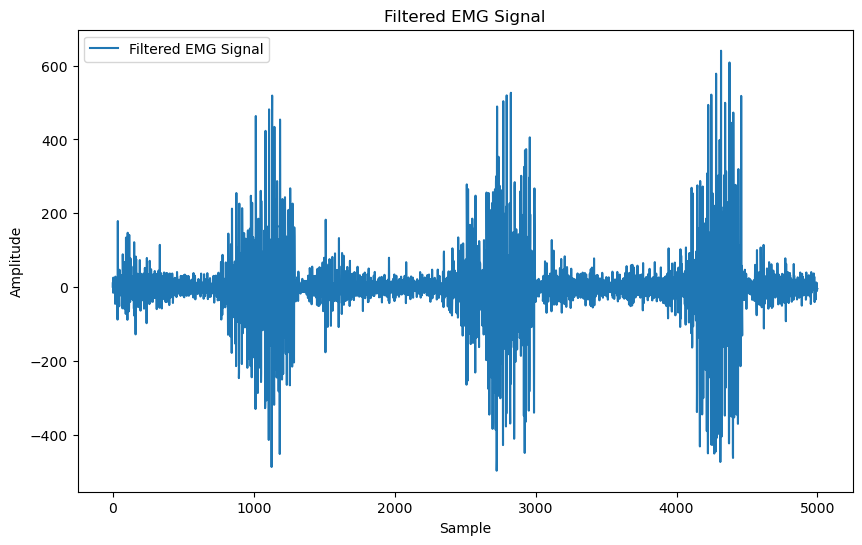

In [70]:
## SIGNAL FILTERING

filtered_signal = butter_bandpass_filter(forearm_emg_data,lowcut,highcut,fs,order)

# Plot filtered signal
plt.figure(figsize=(10, 6))
plt.plot(filtered_signal, label='Filtered EMG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Filtered EMG Signal')
plt.legend()
plt.show()

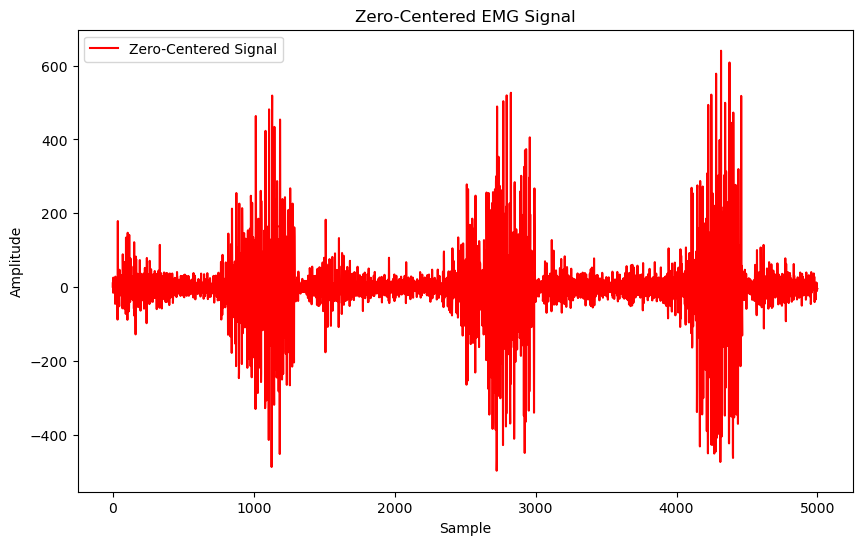

In [87]:
## ZERO_CENTERED SIGNAL FOR FILTERED SIGNAL

zero_centered_signal = zero_centered(filtered_signal)

#Plot Zero-Centered Signal
plt.figure(figsize = (10,6))
plt.plot(zero_centered_signal, label='Zero-Centered Signal', color='red')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Zero-Centered EMG Signal')
plt.legend()
plt.show()

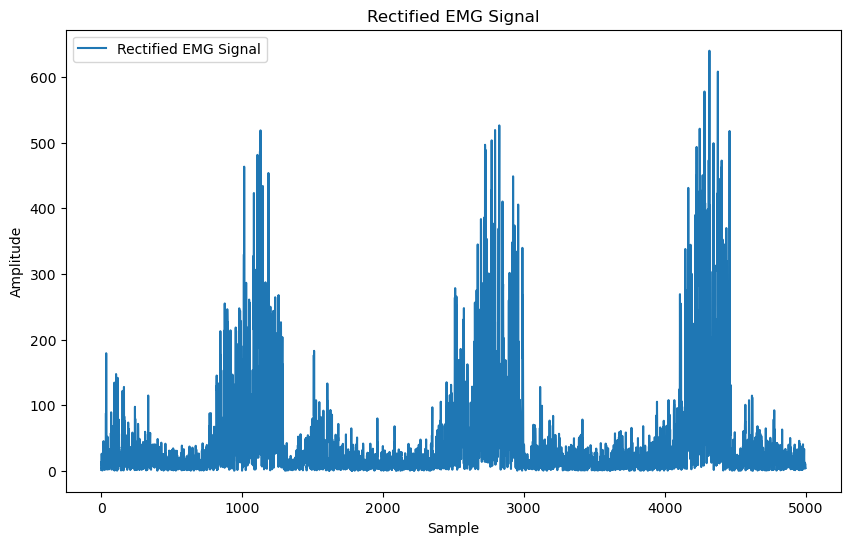

In [71]:
## SIGNAL RECTIFICATION

rectified_signal = rectify_signal(filtered_signal)

# Plot rectified signal
plt.figure(figsize=(10, 6))
plt.plot(rectified_signal, label='Rectified EMG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Rectified EMG Signal')
plt.legend()
plt.show()

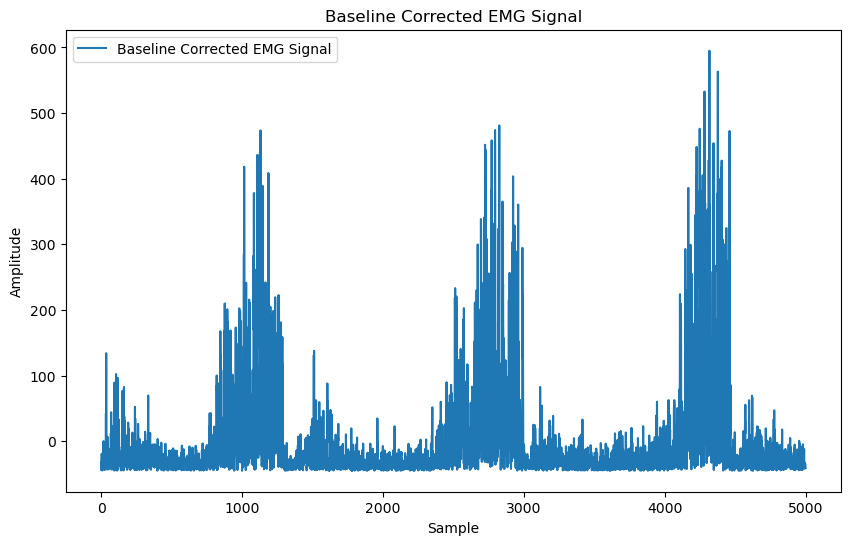

In [72]:
## BASELINE CORRECTION

baseline_corrected_signal = baseline_correction(rectified_signal)

# Plot baseline corrected signal
plt.figure(figsize=(10, 6))
plt.plot(baseline_corrected_signal, label='Baseline Corrected EMG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Baseline Corrected EMG Signal')
plt.legend()
plt.show()

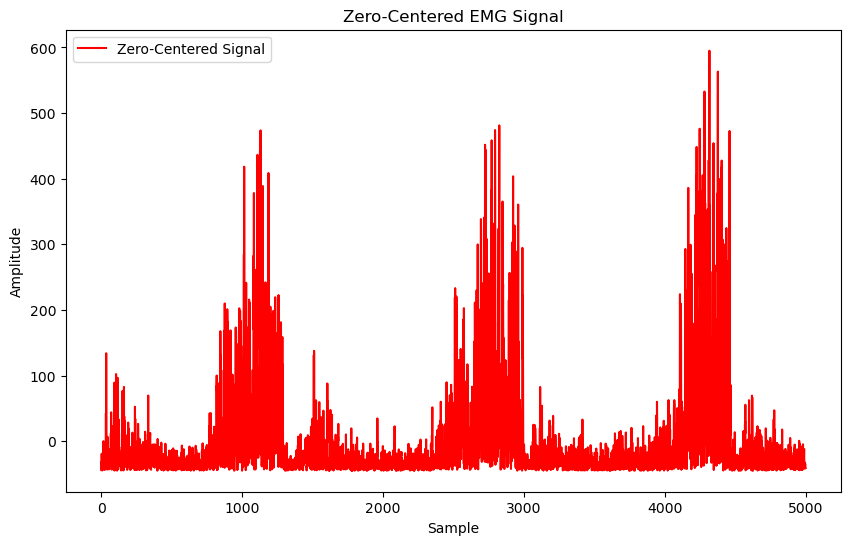

In [82]:
## ZERO_CENTERED SIGNAL

zero_centered_signal = zero_centered(rectified_signal)

#Plot Zero-Centered Signal
plt.figure(figsize = (10,6))
plt.plot(zero_centered_signal, label='Zero-Centered Signal', color='red')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Zero-Centered EMG Signal')
plt.legend()
plt.show()

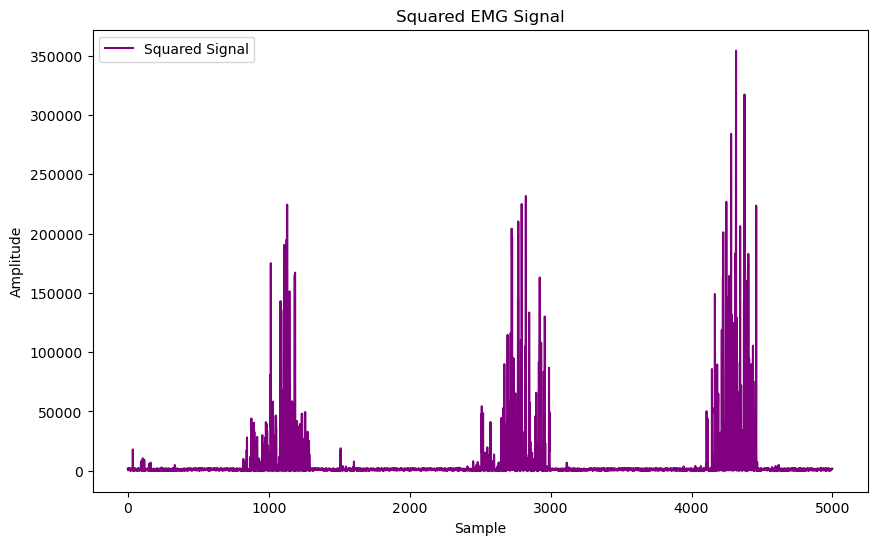

In [85]:
## SQUARED SIGNAL
# Squaring the signal
squared_signal_result = squared_signal(zero_centered_signal)

# Plot Squared Signal
plt.figure(figsize=(10, 6))
plt.plot(squared_signal_result, label='Squared Signal', color='purple')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Squared EMG Signal')
plt.legend()
plt.show()

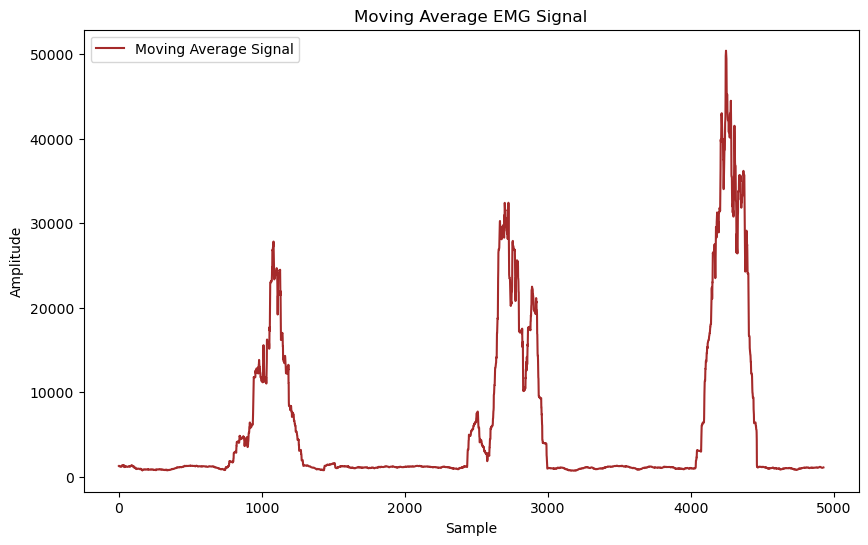

In [89]:
## MOVING AVERAGE

window_length = 75
moving_avg_signal = moving_average(squared_signal_result, window_length)

# Plot Moving Average Signal
plt.figure(figsize=(10, 6))
plt.plot(moving_avg_signal, label='Moving Average Signal', color='brown')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Moving Average EMG Signal')
plt.legend()
plt.show()

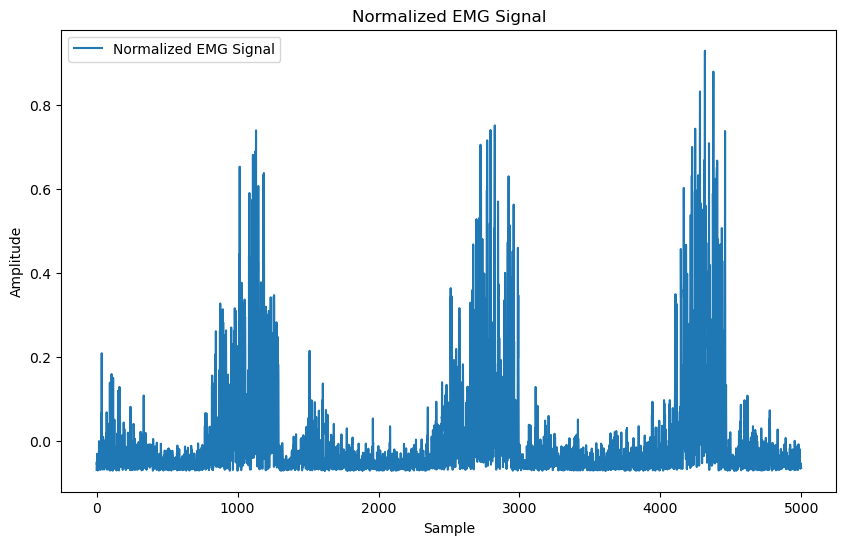

In [73]:
## NORMALIZATION

normalized_signal = normalize_signal(baseline_corrected_signal)

# Plot normalized signal
plt.figure(figsize=(10, 6))
plt.plot(normalized_signal, label='Normalized EMG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Normalized EMG Signal')
plt.legend()
plt.show()

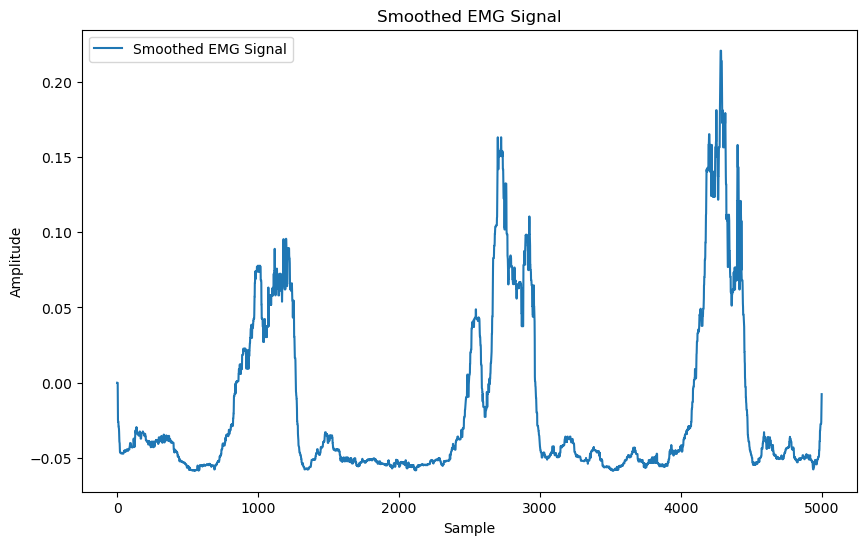

In [90]:
## SIGNAL SMOOTHING

smoothed_signal = smooth_signal(normalized_signal, window_length=75)

# Plot smoothed signal
plt.figure(figsize=(10, 6))
plt.plot(smoothed_signal, label='Smoothed EMG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Smoothed EMG Signal')
plt.legend()
plt.show()

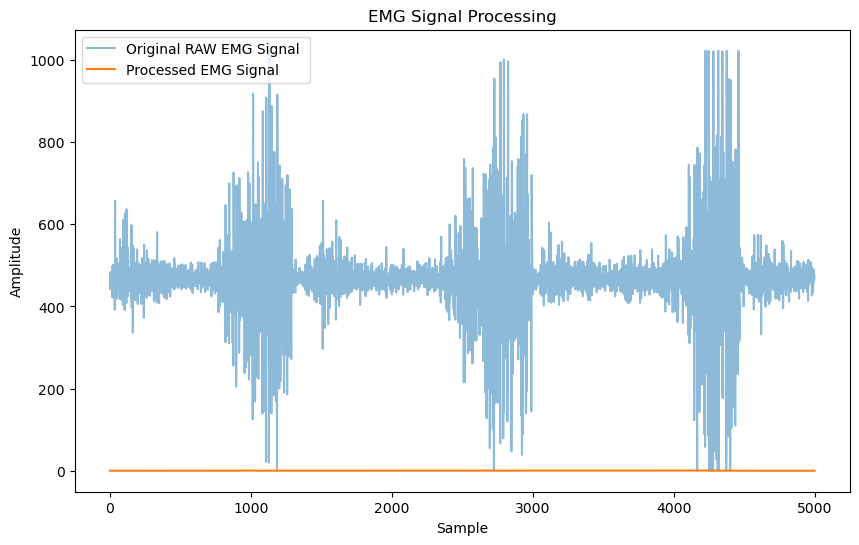

In [75]:
## PLOT ORIGINAL AND PROCESSED SIGNALS

plt.figure(figsize = (10,6))
plt.plot(forearm_emg_data, label = 'Original RAW EMG Signal ', alpha = 0.5)
plt.plot(smoothed_signal, label = 'Processed EMG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('EMG Signal Processing')
plt.legend()
plt.show()

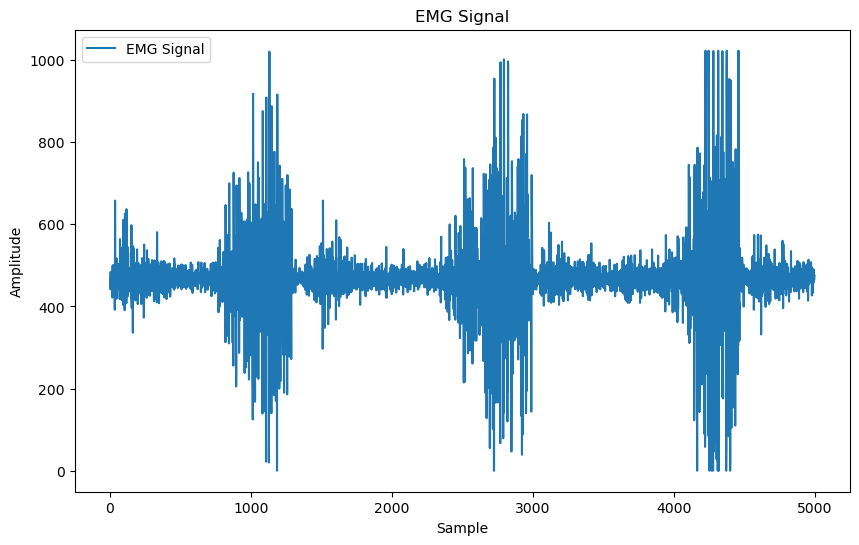

Integrated EMG (Area under the rectified EMG signal): 2341055
Mean Absolute Value (MAV): 468.211
Simple Square Integral (SSI): 1134531189
Root Mean Square (RMS): 476.3467621386756
Variance (VAR): 7684.697279000018
Waveform Length (WL): 247634
Zero-Crossing Rate (ZCR): 20


In [88]:
## FEATURE EXTRACTION

# Define functions for feature extraction
def integrated_emg(signal):
    rectified_signal = np.abs(signal)
    return np.sum(rectified_signal)

def mean_absolute_value(signal):
    return np.mean(np.abs(signal))

def simple_square_integral(signal):
    return np.sum(signal**2)

def root_mean_square(signal):
    return np.sqrt(np.mean(signal**2))

def variance(signal):
    return np.var(signal)

def waveform_length(signal):
    return np.sum(np.abs(np.diff(signal)))

def zero_crossing_rate(signal):
    return np.sum(np.diff(np.sign(signal)) != 0)

# Calculate features
integrated_emg_value = integrated_emg(forearm_emg_data)

mean_absolute_value_value = mean_absolute_value(forearm_emg_data)

simple_square_integral_value = simple_square_integral(forearm_emg_data)

root_mean_square_value = root_mean_square(forearm_emg_data)

variance_value = variance(forearm_emg_data)

waveform_length_value = waveform_length(forearm_emg_data)

zero_crossing_rate_value = zero_crossing_rate(forearm_emg_data)

# Plot the EMG signal
plt.figure(figsize=(10, 6))
plt.plot(forearm_emg_data, label='EMG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('EMG Signal')
plt.legend()
plt.show()

# Print calculated features
print("Integrated EMG (Area under the rectified EMG signal):", integrated_emg_value)
print("Mean Absolute Value (MAV):", mean_absolute_value_value)
print("Simple Square Integral (SSI):", simple_square_integral_value)
print("Root Mean Square (RMS):", root_mean_square_value)
print("Variance (VAR):", variance_value)
print("Waveform Length (WL):", waveform_length_value)
print("Zero-Crossing Rate (ZCR):", zero_crossing_rate_value)

In [2]:
# IMPORT THE NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.signal import medfilt


In [16]:
## REAL TIME PREPROCESSING AND FEATURE EXTRACTION

def extract_features_and_store(data):
    # Preprocessing steps
    zero_centered = data - np.mean(data)
    rectified = np.abs(zero_centered)
    squared = rectified ** 2
    window_size = 400
    moving_avg = np.convolve(squared, np.ones(window_size)/window_size, mode='valid')
    
    # Feature Extraction
    iemg = np.trapz(rectified)
    mav = np.mean(np.abs(data))
    ssi = np.sum(data ** 2)
    rms = np.sqrt(np.mean(data ** 2))
    var = np.var(data)
    wl = np.sum(np.abs(np.diff(data)))
    zcr = np.sum(np.diff(np.sign(data)) != 0)
    
    print("IEMG = ",iemg)
    print("MAV = ",mav)
    print("SSI = ",ssi)
    print("RMS = ",rms)
    print("VAR = ",var)
    print("WL = ",wl)
    print("ZCR = ",zcr)
    
    return iemg,mav,ssi,rms,var,wl,zcr
    

In [17]:
new_fix = extract_features_and_store(forearm_emg_data)

IEMG =  228883.51200000002
MAV =  468.211
SSI =  1134531189
RMS =  476.3467621386756
VAR =  7684.697279000018
WL =  247634
ZCR =  20
